<a href="https://colab.research.google.com/github/SaiPraneethKandagatla/Spam-Mail-Detection-Using-Machine-Learning/blob/main/Spam_mail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.manifold import TSNE
import numpy as np

In [10]:
# Load dataset
data = pd.read_csv('/content/emails.csv')
X = data['text']
y = data['spam']  # 1 for spam, 0 for ham

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Text vectorization
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [13]:
# Using Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_counts, y_train)
nb_preds = nb_model.predict(X_test_counts)
nb_probs = nb_model.predict_proba(X_test_counts)[:, 1]
# Reports
print("\nNaive Bayes Report:\n", classification_report(y_test, nb_preds))
print("Accuracy:", accuracy_score(y_test, nb_preds))


Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       856
           1       0.98      0.97      0.98       290

    accuracy                           0.99      1146
   macro avg       0.98      0.98      0.98      1146
weighted avg       0.99      0.99      0.99      1146

Accuracy: 0.987783595113438


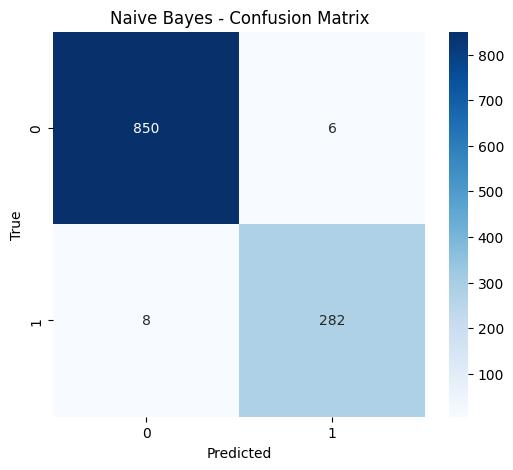

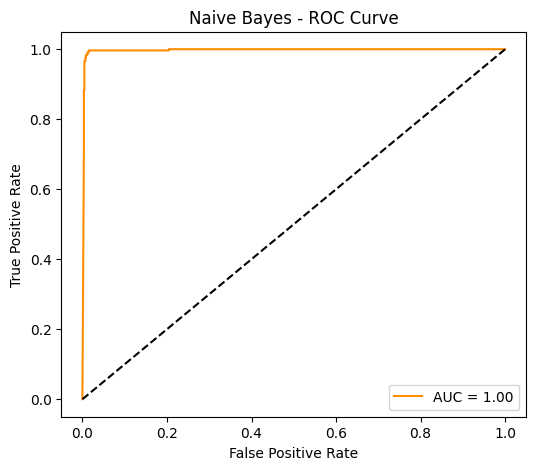

In [16]:
# Plots: Confusion Matrix & ROC
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, nb_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

fpr, tpr, _ = roc_curve(y_test, nb_probs)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', label=f"AUC = {auc(fpr, tpr):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Naive Bayes - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [17]:
# Using Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_counts, y_train)
dt_preds = dt_model.predict(X_test_counts)
print("\nDecision Tree Report:\n", classification_report(y_test, dt_preds))
print("Accuracy:", accuracy_score(y_test, dt_preds))


Decision Tree Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       856
           1       0.91      0.90      0.90       290

    accuracy                           0.95      1146
   macro avg       0.94      0.93      0.94      1146
weighted avg       0.95      0.95      0.95      1146

Accuracy: 0.9511343804537522


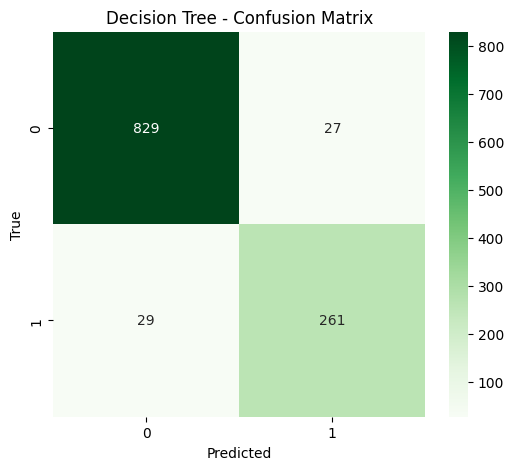

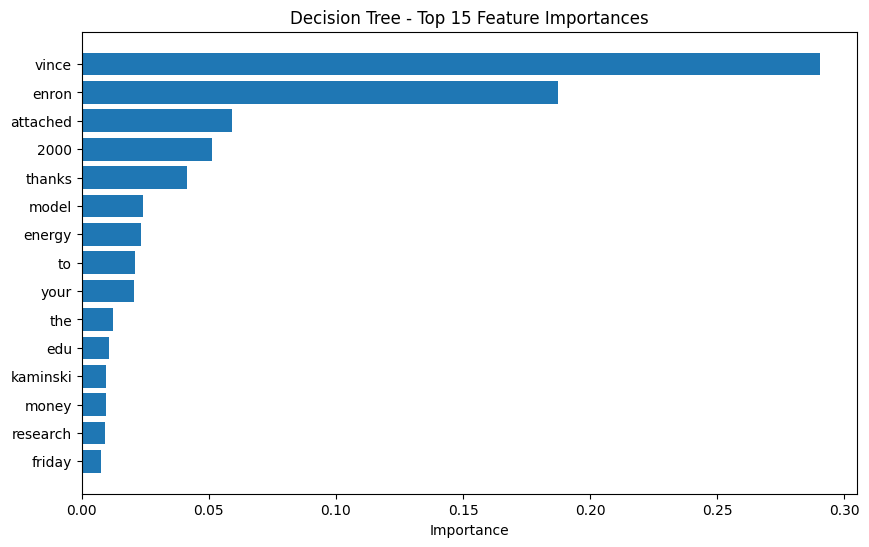

In [18]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, dt_preds), annot=True, fmt='d', cmap='Greens')
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Feature Importance Plot
importances = dt_model.feature_importances_
indices = np.argsort(importances)[-15:]  # Top 15 features
top_features = [vectorizer.get_feature_names_out()[i] for i in indices]
plt.figure(figsize=(10, 6))
plt.barh(top_features, importances[indices])
plt.title("Decision Tree - Top 15 Feature Importances")
plt.xlabel("Importance")
plt.show()

In [19]:
# Using K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_counts, y_train)
knn_preds = knn_model.predict(X_test_counts)
knn_probs = knn_model.predict_proba(X_test_counts)[:, 1]

print("\nKNN Report:\n", classification_report(y_test, knn_preds))
print("Accuracy:", accuracy_score(y_test, knn_preds))


KNN Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       856
           1       0.94      0.68      0.79       290

    accuracy                           0.91      1146
   macro avg       0.92      0.83      0.86      1146
weighted avg       0.91      0.91      0.90      1146

Accuracy: 0.9075043630017452


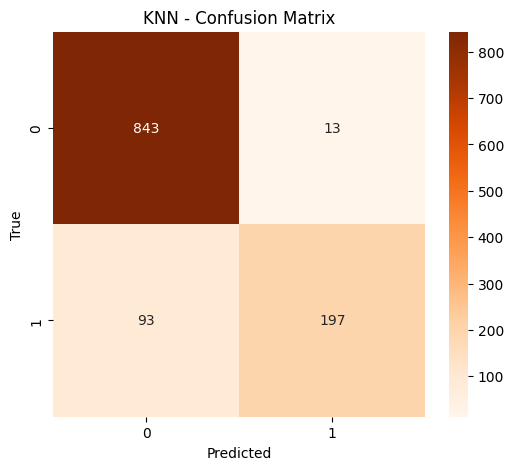

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


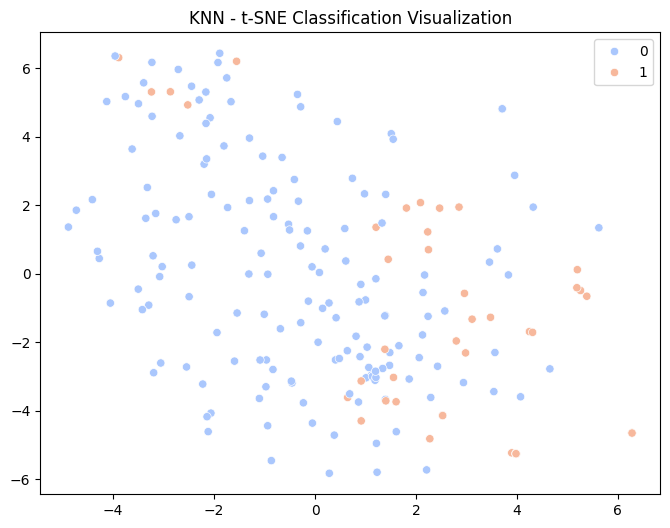

In [20]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, knn_preds), annot=True, fmt='d', cmap='Oranges')
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# t-SNE Projection (for visualization)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=500)
X_proj = tsne.fit_transform(X_test_counts[:200].toarray())  # limit to 200 for speed
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_proj[:, 0], y=X_proj[:, 1], hue=knn_preds[:200], palette='coolwarm')
plt.title("KNN - t-SNE Classification Visualization")
plt.show()

In [21]:
# Using Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_counts, y_train)
lr_raw = lr_model.predict(X_test_counts)
lr_preds = [1 if p > 0.5 else 0 for p in lr_raw]

print("\nLinear Regression Report:\n", classification_report(y_test, lr_preds))
print("Accuracy:", accuracy_score(y_test, lr_preds))


Linear Regression Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       856
           1       0.88      0.84      0.86       290

    accuracy                           0.93      1146
   macro avg       0.91      0.90      0.91      1146
weighted avg       0.93      0.93      0.93      1146

Accuracy: 0.931064572425829


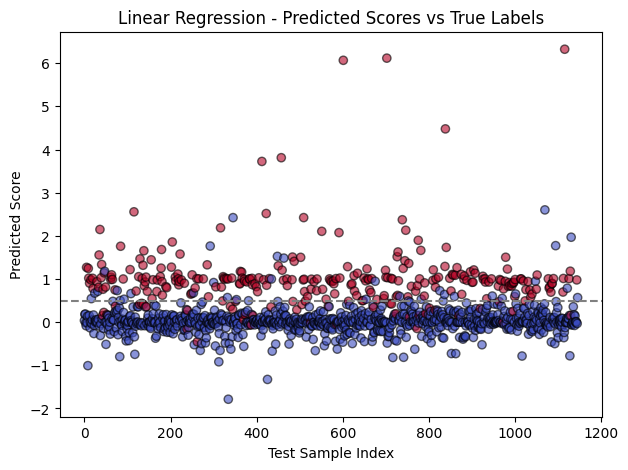

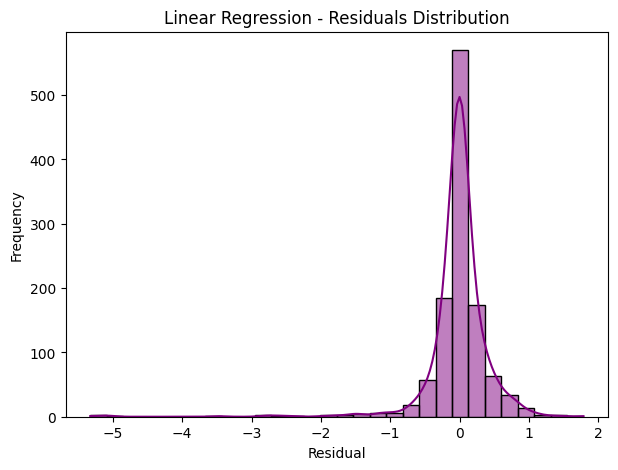

In [22]:
# Prediction vs True Labels
plt.figure(figsize=(7, 5))
plt.scatter(range(len(y_test)), lr_raw, c=y_test, cmap='coolwarm', edgecolor='k', alpha=0.6)
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.title("Linear Regression - Predicted Scores vs True Labels")
plt.xlabel("Test Sample Index")
plt.ylabel("Predicted Score")
plt.show()

# Residuals Plot
residuals = y_test.values - lr_raw
plt.figure(figsize=(7, 5))
sns.histplot(residuals, kde=True, bins=30, color='purple')
plt.title("Linear Regression - Residuals Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()